# 📈 Neural Network สำหรับ Regression: ทำนายค่าต่อเนื่อง

**จุดประสงค์**: เข้าใจวิธีใช้ Neural Network ทำ **Regression** (ทำนายค่าต่อเนื่อง)

**โค้ดต้นฉบับ**: `machine_learning_examples-master/ann_class/regression.py`

---

## 🎯 Regression vs Classification

| | Classification | Regression |
|---|---|---|
| **Output** | Class (discrete) | ค่าต่อเนื่อง (continuous) |
| **ตัวอย่าง** | สแปมหรือไม่? (0 or 1) | ราคาบ้าน (100-500K) |
| **Output Activation** | Softmax | **Linear** (ไม่มี) |
| **Loss Function** | Cross-Entropy | **MSE** (Mean Squared Error) |

---

## 🏗️ Network Architecture

```
Input (2D)  →  Hidden Layer (100 neurons, ReLU)  →  Output (1 value, linear)
   X (N,2)         Z (N,100)                           Yhat (N,)
              W(2,100), b(100)                      V(100,), c
```

### สูตร:

**Forward Pass**:
- Hidden: $Z = \text{ReLU}(X \cdot W + b)$
- Output: $\hat{Y} = Z \cdot V + c$ ← **Linear** (ไม่มี activation)

**Loss Function** (MSE):
$$L = \frac{1}{N} \sum (Y - \hat{Y})^2$$

**Activation Functions**:
- **ReLU**: $\text{ReLU}(x) = \max(0, x)$ ← ใช้ใน hidden layer
- **Linear**: ไม่มี activation ← ใช้ใน output (regression)

---

## 📊 ข้อมูล: Saddle Shape

- **Input**: X (N, 2) - จุดใน 2D space
- **Output**: Y = X₀ × X₁ - สร้างรูปทรง "saddle" (อานม้า)
- **Task**: ทำนายค่า Y จาก X

💡 **Saddle Shape** = รูปทรงที่โค้งขึ้นทิศหนึ่ง แต่โค้งลงอีกทิศหนึ่ง

## 📦 Step 1: เตรียมความพร้อม

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# เพิ่ม path
sys.path.append('../../machine_learning_examples-master')

# Set seed for reproducibility
np.random.seed(42)

print("✅ พร้อมเรียนรู้ Neural Network Regression!")

✅ พร้อมเรียนรู้ Neural Network Regression!


## 🔢 Step 2: สร้างข้อมูล (Saddle Shape)

**แนวคิด**: สร้างข้อมูล 3D ที่มีรูปร่างพิเศษ

- **Input**: X = random points ใน 2D (-2 ถึง +2)
- **Output**: Y = X₀ × X₁ → สร้างรูปทรง "saddle"

$$Y = X_0 \times X_1$$

In [3]:
# สร้างข้อมูล
N = 500
X = np.random.random((N, 2)) * 4 - 2  # ค่าระหว่าง -2 ถึง +2
Y = X[:, 0] * X[:, 1]  # Y = X₀ × X₁ (saddle shape)

print(f"✅ สร้างข้อมูลเรียบร้อย!")
print(f"📌 X shape: {X.shape} (N x 2)")
print(f"📌 Y shape: {Y.shape} (N,)")
print(f"")
print(f"💡 ตัวอย่างข้อมูล:")
for i in range(5):
    print(f"   X[{i}] = [{X[i,0]:6.3f}, {X[i,1]:6.3f}] → Y[{i}] = {Y[i]:6.3f}")

print(f"")
print(f"📊 สถิติของ Y:")
print(f"   Min: {Y.min():.3f}")
print(f"   Max: {Y.max():.3f}")
print(f"   Mean: {Y.mean():.3f}")
print(f"   Std: {Y.std():.3f}")

✅ สร้างข้อมูลเรียบร้อย!
📌 X shape: (500, 2) (N x 2)
📌 Y shape: (500,) (N,)

💡 ตัวอย่างข้อมูล:
   X[0] = [-0.502,  1.803] → Y[0] = -0.905
   X[1] = [ 0.928,  0.395] → Y[1] =  0.366
   X[2] = [-1.376, -1.376] → Y[2] =  1.893
   X[3] = [-1.768,  1.465] → Y[3] = -2.589
   X[4] = [ 0.404,  0.832] → Y[4] =  0.337

📊 สถิติของ Y:
   Min: -3.668
   Max: 3.690
   Mean: 0.026
   Std: 1.375


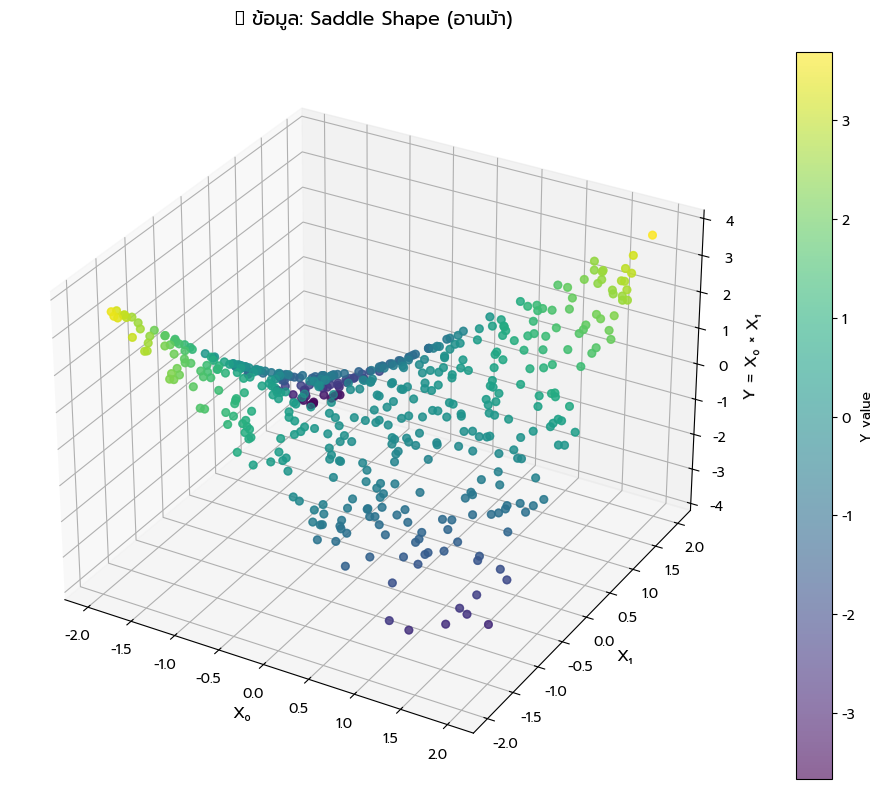

💡 Saddle Shape:
   • ถ้า X₀ > 0, X₁ > 0 → Y > 0 (สูง)
   • ถ้า X₀ < 0, X₁ < 0 → Y > 0 (สูง)
   • ถ้า X₀ > 0, X₁ < 0 → Y < 0 (ต่ำ)
   • ถ้า X₀ < 0, X₁ > 0 → Y < 0 (ต่ำ)


In [4]:
# Visualize ข้อมูล 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis', s=30, alpha=0.6)
ax.set_xlabel('X₀', fontsize=12)
ax.set_ylabel('X₁', fontsize=12)
ax.set_zlabel('Y = X₀ × X₁', fontsize=12)
ax.set_title('📊 ข้อมูล: Saddle Shape (อานม้า)', fontsize=14, fontweight='bold', pad=20)
plt.colorbar(ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis', s=30, alpha=0.6), 
             ax=ax, label='Y value')
plt.tight_layout()
plt.show()

print("💡 Saddle Shape:")
print("   • ถ้า X₀ > 0, X₁ > 0 → Y > 0 (สูง)")
print("   • ถ้า X₀ < 0, X₁ < 0 → Y > 0 (สูง)")
print("   • ถ้า X₀ > 0, X₁ < 0 → Y < 0 (ต่ำ)")
print("   • ถ้า X₀ < 0, X₁ > 0 → Y < 0 (ต่ำ)")

## 🏋️ Step 3: Initialize Weights

**แนวคิด**: สุ่ม weights เริ่มต้นด้วย Xavier/He initialization

- **Xavier Init**: $W \sim N(0, \frac{1}{\sqrt{n_{in}}})$
- **ทำไม?**: เพื่อไม่ให้ gradient explode/vanish

**Architecture**:
- **Layer 1** (Hidden): W (2, 100), b (100,)
- **Layer 2** (Output): V (100,), c (scalar)

In [15]:
# กำหนด architecture
D = 2    # จำนวน input features
M = 100  # จำนวน hidden neurons

# Layer 1: Hidden Layer
W = np.random.randn(D, M) / np.sqrt(D)  # Xavier init
b = np.zeros(M)

# Layer 2: Output Layer
V = np.random.randn(M) / np.sqrt(M)  # Xavier init
c = 0

print("✅ Weights initialized!")
print(f"")
print(f"📌 Layer 1 (Hidden):")
print(f"   W shape: {W.shape} (D x M) = (2 x 100)")
print(f"   b shape: {b.shape} (M,) = (100,)")
print(f"")
print(f"📌 Layer 2 (Output):")
print(f"   V shape: {V.shape} (M,) = (100,)")
print(f"   c: {c} (scalar)")
print(f"")
print(f"💡 Xavier Initialization:")
print(f"   • W ~ N(0, 1/√D) → std = {1/np.sqrt(D):.4f}")
print(f"   • V ~ N(0, 1/√M) → std = {1/np.sqrt(M):.4f}")
print(f"   • ป้องกัน gradient explode/vanish")

✅ Weights initialized!

📌 Layer 1 (Hidden):
   W shape: (2, 100) (D x M) = (2 x 100)
   b shape: (100,) (M,) = (100,)

📌 Layer 2 (Output):
   V shape: (100,) (M,) = (100,)
   c: 0 (scalar)

💡 Xavier Initialization:
   • W ~ N(0, 1/√D) → std = 0.7071
   • V ~ N(0, 1/√M) → std = 0.1000
   • ป้องกัน gradient explode/vanish


## 🔧 Step 4: Forward Pass Function

**แนวคิด**: คำนวณ prediction

### 4.1 ReLU Activation

$$\text{ReLU}(x) = \max(0, x) = \begin{cases} x & \text{if } x > 0 \\ 0 & \text{otherwise} \end{cases}$$

**ทำไมใช้ ReLU?**
- เร็วกว่า sigmoid/tanh
- ไม่มี vanishing gradient
- ทำงานได้ดีกับ deep networks

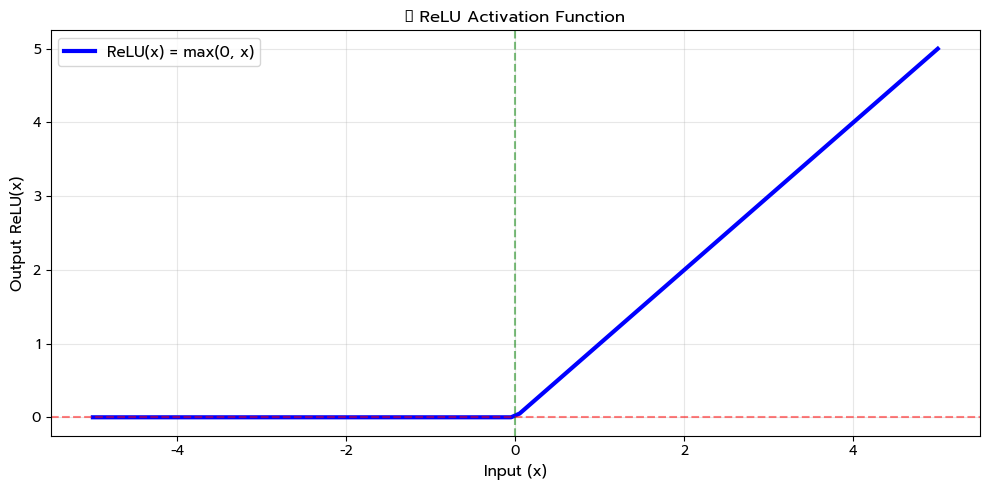

💡 ReLU Properties:
   • x < 0 → ReLU(x) = 0
   • x ≥ 0 → ReLU(x) = x
   • Non-linear + Fast + No vanishing gradient


In [16]:
# Plot ReLU activation
x = np.linspace(-5, 5, 100)
relu = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, relu, linewidth=3, color='blue', label='ReLU(x) = max(0, x)')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='green', linestyle='--', alpha=0.5)
plt.title('📈 ReLU Activation Function', fontsize=12, fontweight='bold')
plt.xlabel('Input (x)', fontsize=11)
plt.ylabel('Output ReLU(x)', fontsize=11)
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("💡 ReLU Properties:")
print("   • x < 0 → ReLU(x) = 0")
print("   • x ≥ 0 → ReLU(x) = x")
print("   • Non-linear + Fast + No vanishing gradient")

### 4.2 Forward Function

**Steps**:
1. Hidden: $Z = \text{ReLU}(X \cdot W + b)$
2. Output: $\hat{Y} = Z \cdot V + c$ ← **Linear** (no activation)

In [17]:
def forward(X):
    """
    Forward Propagation สำหรับ Regression
    
    Architecture:
    Input X → Hidden Z (ReLU) → Output Yhat (Linear)
    
    Parameters:
    - X: input (N, D)
    
    Returns:
    - Z: hidden activations (N, M)
    - Yhat: predictions (N,)
    
    Note: ใช้ global variables W, b, V, c
    """
    # Hidden Layer: Z = ReLU(X·W + b)
    Z = X.dot(W) + b
    Z = Z * (Z > 0)  # ReLU: max(0, x)
    # Alternative: Z = np.tanh(Z)  # Tanh activation
    
    # Output Layer: Yhat = Z·V + c (Linear - no activation)
    Yhat = Z.dot(V) + c
    
    return Z, Yhat

print("✅ Forward function พร้อมแล้ว!")
print("")
print("💡 Regression vs Classification:")
print("   Classification: Output = Softmax (probabilities)")
print("   Regression: Output = Linear (continuous values)")

✅ Forward function พร้อมแล้ว!

💡 Regression vs Classification:
   Classification: Output = Softmax (probabilities)
   Regression: Output = Linear (continuous values)


## 📉 Step 5: Loss Function (MSE)

**Mean Squared Error (MSE)**:

$$L = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2$$

**ทำไมใช้ MSE?**
- วัดความแตกต่างระหว่างค่าจริง (Y) กับค่าทำนาย (Ŷ)
- ยกกำลังสอง → penalty ข้อผิดพลาดใหญ่มากขึ้น
- Differentiable → หา gradient ได้

In [18]:
def get_cost(Y, Yhat):
    """
    คำนวณ Mean Squared Error (MSE)
    
    L = (1/N) Σ (Y - Yhat)²
    
    Parameters:
    - Y: true values (N,)
    - Yhat: predicted values (N,)
    
    Returns:
    - cost: MSE (scalar)
    """
    return ((Y - Yhat) ** 2).mean()

print("✅ Cost function (MSE) พร้อมแล้ว!")
print("")
print("💡 MSE Properties:")
print("   • ยิ่ง MSE ต่ำ → โมเดลยิ่งดี")
print("   • Penalize large errors more (squared)")
print("   • เหมาะกับ regression problems")

✅ Cost function (MSE) พร้อมแล้ว!

💡 MSE Properties:
   • ยิ่ง MSE ต่ำ → โมเดลยิ่งดี
   • Penalize large errors more (squared)
   • เหมาะกับ regression problems


## 🎓 Step 6: Gradient Functions (Backpropagation)

**แนวคิด**: คำนวณ gradients เพื่ออัปเดต weights

### Gradients:

**Output Layer**:
- $\frac{\partial L}{\partial V} = (Y - \hat{Y})^T \cdot Z$
- $\frac{\partial L}{\partial c} = \sum (Y - \hat{Y})$

**Hidden Layer** (with ReLU):
- $\frac{\partial L}{\partial W} = X^T \cdot [(Y - \hat{Y}) \cdot V^T \odot \mathbb{1}_{Z>0}]$
- $\frac{\partial L}{\partial b} = \sum [(Y - \hat{Y}) \cdot V^T \odot \mathbb{1}_{Z>0}]$

โดย $\mathbb{1}_{Z>0}$ = derivative ของ ReLU

In [19]:
def derivative_V(Z, Y, Yhat):
    """
    Gradient ของ V (output weights)
    
    dL/dV = (Y - Yhat)^T · Z
    """
    return (Y - Yhat).dot(Z)

def derivative_c(Y, Yhat):
    """
    Gradient ของ c (output bias)
    
    dL/dc = Σ(Y - Yhat)
    """
    return (Y - Yhat).sum()

def derivative_W(X, Z, Y, Yhat, V):
    """
    Gradient ของ W (hidden weights)
    
    dL/dW = X^T · [(Y-Yhat)·V^T ⊙ 1_{Z>0}]
    
    Note: 
    - ReLU derivative: 1 if Z>0, else 0
    - Tanh derivative: 1 - Z²
    """
    # For ReLU
    dZ = np.outer(Y - Yhat, V) * (Z > 0)
    
    # For Tanh (commented out)
    # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z)
    
    return X.T.dot(dZ)

def derivative_b(Z, Y, Yhat, V):
    """
    Gradient ของ b (hidden bias)
    
    dL/db = Σ[(Y-Yhat)·V^T ⊙ 1_{Z>0}]
    """
    # For ReLU
    dZ = np.outer(Y - Yhat, V) * (Z > 0)
    
    # For Tanh (commented out)
    # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z)
    
    return dZ.sum(axis=0)

print("✅ Gradient functions (Backpropagation) พร้อมแล้ว!")
print("")
print("💡 Key Difference from Classification:")
print("   • Loss: MSE (not Cross-Entropy)")
print("   • Gradient direction: (Y - Yhat) not (T - Y)")
print("   • Output: Linear (no softmax)")

✅ Gradient functions (Backpropagation) พร้อมแล้ว!

💡 Key Difference from Classification:
   • Loss: MSE (not Cross-Entropy)
   • Gradient direction: (Y - Yhat) not (T - Y)
   • Output: Linear (no softmax)


### Update Function

**แนวคิด**: อัปเดต weights ด้วย Gradient Ascent

$$W = W + \text{learning\_rate} \times \frac{\partial L}{\partial W}$$

In [20]:
def update(X, Z, Y, Yhat, W, b, V, c, learning_rate=1e-4):
    """
    Update weights ด้วย Gradient Ascent
    
    Parameters:
    - X, Z, Y, Yhat: from forward pass
    - W, b, V, c: current weights
    - learning_rate: step size
    
    Returns:
    - W, b, V, c: updated weights
    """
    # คำนวณ gradients
    gV = derivative_V(Z, Y, Yhat)
    gc = derivative_c(Y, Yhat)
    gW = derivative_W(X, Z, Y, Yhat, V)
    gb = derivative_b(Z, Y, Yhat, V)
    
    # อัปเดต weights (Gradient Ascent)
    V += learning_rate * gV
    c += learning_rate * gc
    W += learning_rate * gW
    b += learning_rate * gb
    
    return W, b, V, c

print("✅ Update function พร้อมแล้ว!")

✅ Update function พร้อมแล้ว!


## 🏋️ Step 7: Training Loop

**แนวคิด**: วนซ้ำหลายๆ epochs เพื่อปรับ weights

**ขั้นตอน**:
1. Forward Pass → ได้ Ŷ
2. Calculate Cost (MSE)
3. Backward Pass → ได้ gradients
4. Update Weights
5. Repeat!

In [21]:
learning_rate = 1e-4
epochs = 200
costs = []

print("🏋️ เริ่ม Training...\n")

for i in range(epochs):
    # Forward Pass
    Z, Yhat = forward(X)
    
    # Update Weights (Backward + Gradient Ascent)
    W, b, V, c = update(X, Z, Y, Yhat, W, b, V, c, learning_rate)
    
    # Calculate Cost
    cost = get_cost(Y, Yhat)
    costs.append(cost)
    
    # Print progress
    if i % 25 == 0:
        print(f"Epoch {i:3d} | Cost (MSE): {cost:.6f}")

print("\n✅ Training เสร็จแล้ว!")
print(f"")
print(f"📊 สรุปผลลัพธ์:")
print(f"   • Cost เริ่มต้น: {costs[0]:.6f}")
print(f"   • Cost สุดท้าย: {costs[-1]:.6f}")
print(f"   • ลดลง: {(costs[0] - costs[-1]) / costs[0] * 100:.2f}%")

🏋️ เริ่ม Training...

Epoch   0 | Cost (MSE): 1.616860
Epoch  25 | Cost (MSE): 0.089638
Epoch  50 | Cost (MSE): 0.087308
Epoch  75 | Cost (MSE): 0.085437
Epoch 100 | Cost (MSE): 0.083775
Epoch 125 | Cost (MSE): 0.082290
Epoch 150 | Cost (MSE): 0.080952
Epoch 175 | Cost (MSE): 0.079743

✅ Training เสร็จแล้ว!

📊 สรุปผลลัพธ์:
   • Cost เริ่มต้น: 1.616860
   • Cost สุดท้าย: 0.078674
   • ลดลง: 95.13%


## 📊 Step 8: Visualize Training Progress

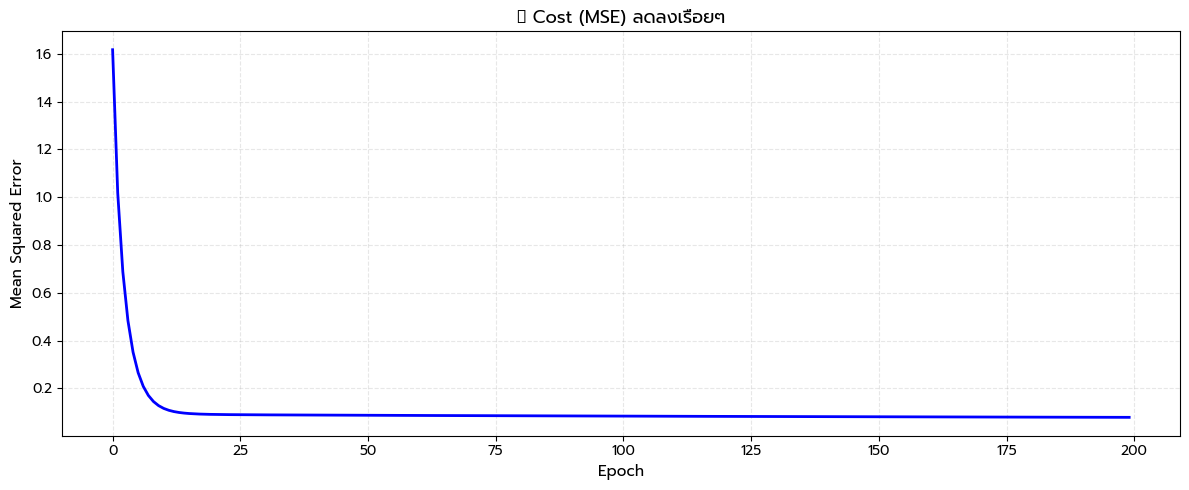

💡 สังเกต:
   • Cost ลดลงอย่างรวดเร็วในช่วงแรก
   • จากนั้นค่อยๆ converge (เข้าสู่ optimum)
   • นี่คือการเรียนรู้ของ Neural Network!


In [22]:
# Plot Cost
plt.figure(figsize=(12, 5))
plt.plot(costs, linewidth=2, color='blue')
plt.title('📉 Cost (MSE) ลดลงเรื่อยๆ', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Mean Squared Error', fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("💡 สังเกต:")
print("   • Cost ลดลงอย่างรวดเร็วในช่วงแรก")
print("   • จากนั้นค่อยๆ converge (เข้าสู่ optimum)")
print("   • นี่คือการเรียนรู้ของ Neural Network!")

## 🎯 Step 9: Visualize Prediction Surface

**แนวคิด**: ดูว่าโมเดลเรียนรู้ saddle shape ได้ดีแค่ไหน

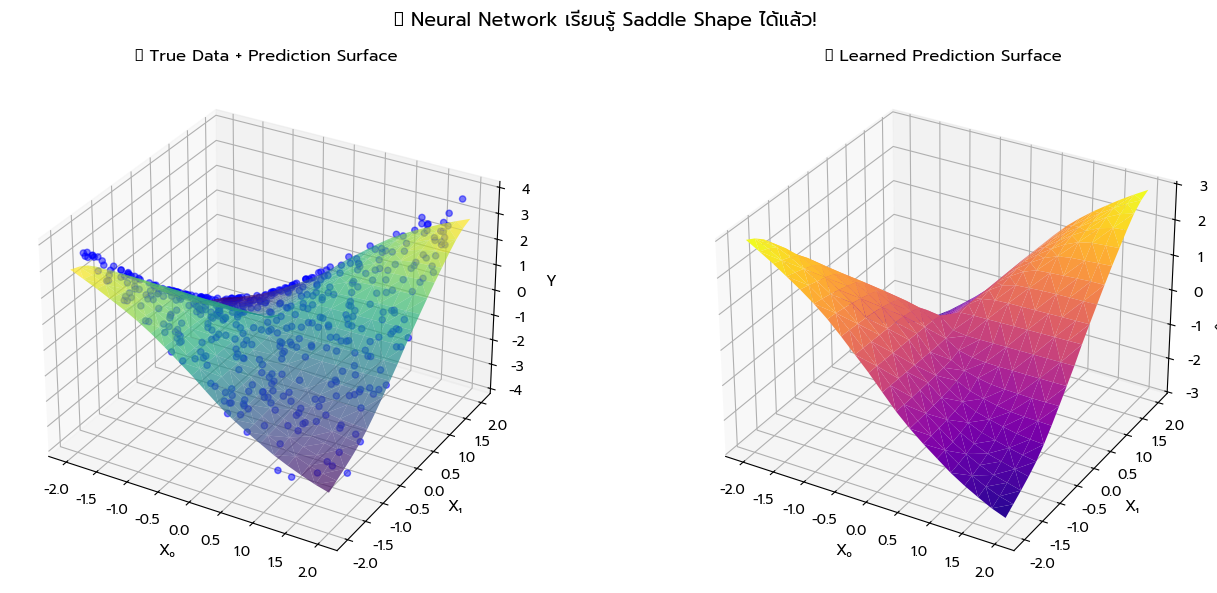

💡 สังเกต:
   • Prediction surface (สีเขียว) fit กับ data points (สีน้ำเงิน) ได้ดี
   • Neural Network เรียนรู้รูปร่าง saddle ได้สำเร็จ!


In [23]:
# สร้าง grid สำหรับ plot surface
line = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# ทำนายบน grid
_, Yhat_grid = forward(Xgrid)

# Plot: Data + Prediction Surface
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Data points + Prediction surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], Y, c='blue', s=20, alpha=0.5, label='True Data')
ax1.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat_grid, linewidth=0.2, 
                 antialiased=True, alpha=0.7, cmap='viridis', label='Prediction')
ax1.set_xlabel('X₀', fontsize=11)
ax1.set_ylabel('X₁', fontsize=11)
ax1.set_zlabel('Y', fontsize=11)
ax1.set_title('🎯 True Data + Prediction Surface', fontsize=12, fontweight='bold')

# Subplot 2: Prediction surface only
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat_grid, linewidth=0.2, 
                 antialiased=True, cmap='plasma')
ax2.set_xlabel('X₀', fontsize=11)
ax2.set_ylabel('X₁', fontsize=11)
ax2.set_zlabel('Ŷ (Predicted)', fontsize=11)
ax2.set_title('📈 Learned Prediction Surface', fontsize=12, fontweight='bold')

plt.suptitle('🏆 Neural Network เรียนรู้ Saddle Shape ได้แล้ว!', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("💡 สังเกต:")
print("   • Prediction surface (สีเขียว) fit กับ data points (สีน้ำเงิน) ได้ดี")
print("   • Neural Network เรียนรู้รูปร่าง saddle ได้สำเร็จ!")

## 🔍 Step 10: Analyze Residuals (ความคลาดเคลื่อน)

**แนวคิด**: ดูว่าโมเดลทำนายผิดตรงไหนมากที่สุด

**Residual**: $R = |Y_{\text{true}} - \hat{Y}|$

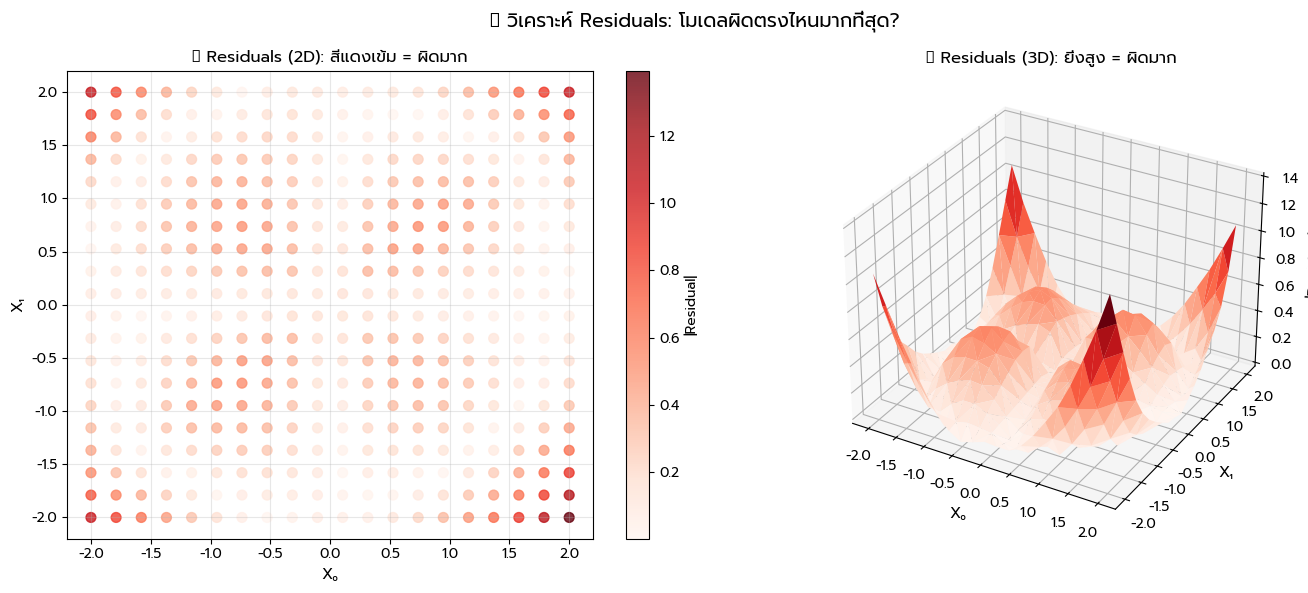

📊 สถิติ Residuals:
   Mean |Residual|: 0.250372
   Max |Residual|: 1.394822
   Min |Residual|: 0.000296
   Std |Residual|: 0.212902

💡 สังเกต:
   • Residuals ส่วนใหญ่ต่ำ (สีอ่อน) → โมเดลทำนายได้ดี
   • บางจุดมี residual สูง (สีเข้ม) → ยังทำนายผิดอยู่บ้าง
   • เป็นเรื่องปกติ! ไม่มีโมเดลไหน perfect 100%


In [24]:
# คำนวณ true values และ residuals บน grid
Ygrid_true = Xgrid[:, 0] * Xgrid[:, 1]  # True Y
R = np.abs(Ygrid_true - Yhat_grid)       # Absolute residuals

# Plot Residuals
fig = plt.figure(figsize=(14, 6))

# Subplot 1: 2D scatter (color = residual)
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(Xgrid[:, 0], Xgrid[:, 1], c=R, cmap='Reds', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax1, label='|Residual|')
ax1.set_xlabel('X₀', fontsize=11)
ax1.set_ylabel('X₁', fontsize=11)
ax1.set_title('🔍 Residuals (2D): สีแดงเข้ม = ผิดมาก', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Subplot 2: 3D surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], R, linewidth=0.2, 
                 antialiased=True, cmap='Reds')
ax2.set_xlabel('X₀', fontsize=11)
ax2.set_ylabel('X₁', fontsize=11)
ax2.set_zlabel('|Residual|', fontsize=11)
ax2.set_title('🔍 Residuals (3D): ยิ่งสูง = ผิดมาก', fontsize=12, fontweight='bold')

plt.suptitle('📊 วิเคราะห์ Residuals: โมเดลผิดตรงไหนมากที่สุด?', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# สถิติ residuals
print("📊 สถิติ Residuals:")
print(f"   Mean |Residual|: {R.mean():.6f}")
print(f"   Max |Residual|: {R.max():.6f}")
print(f"   Min |Residual|: {R.min():.6f}")
print(f"   Std |Residual|: {R.std():.6f}")

print("")
print("💡 สังเกต:")
print("   • Residuals ส่วนใหญ่ต่ำ (สีอ่อน) → โมเดลทำนายได้ดี")
print("   • บางจุดมี residual สูง (สีเข้ม) → ยังทำนายผิดอยู่บ้าง")
print("   • เป็นเรื่องปกติ! ไม่มีโมเดลไหน perfect 100%")

## 🎓 สรุปสุดท้าย: Neural Network Regression

### 🔑 Key Concepts:

#### 1️⃣ **Regression vs Classification**:

| Aspect | Classification | Regression |
|--------|----------------|------------|
| **Output** | Discrete classes | Continuous values |
| **Output Activation** | Softmax | **Linear** (no activation) |
| **Loss Function** | Cross-Entropy | **MSE** |
| **Metric** | Accuracy | MSE, MAE, R² |

#### 2️⃣ **Architecture**:

```
Input (2D) → Hidden (100, ReLU) → Output (1, Linear)
```

**Key Points**:
- Hidden: ReLU activation (non-linear)
- Output: **Linear** (ไม่มี activation) ← สำคัญสำหรับ regression!

#### 3️⃣ **Training Process**:

1. **Forward**: $Z = \text{ReLU}(X \cdot W + b)$, $\hat{Y} = Z \cdot V + c$
2. **Loss**: $L = \frac{1}{N} \sum (Y - \hat{Y})^2$ (MSE)
3. **Backward**: คำนวณ gradients ด้วย Chain Rule
4. **Update**: $W = W + lr \times \frac{\partial L}{\partial W}$

---

### 💡 ทำไมถึงใช้ได้?

**Universal Approximation Theorem**:
> Neural Network (1 hidden layer พอ) สามารถ approximate ฟังก์ชันใดๆ ได้!

**ในโค้ดนี้**:
- เรียนรู้ $Y = X_0 \times X_1$ (saddle shape)
- 100 hidden neurons → พอที่จะ approximate ได้
- MSE ลดลง → โมเดลเรียนรู้แล้ว!

---

### 🎯 สิ่งที่เรียนรู้:

#### ✅ **Neural Network สำหรับ Regression**:
- Output layer: **Linear** (no activation)
- Loss: **MSE** (Mean Squared Error)
- Gradient: $(Y - \hat{Y})$ (not $(T - Y)$ like classification)

#### ✅ **ReLU Activation**:
- $\text{ReLU}(x) = \max(0, x)$
- Fast, no vanishing gradient
- Standard choice สำหรับ deep networks

#### ✅ **Visualization**:
- 3D scatter plot: ดูข้อมูล
- 3D surface: ดู prediction
- Residuals: ดูว่าผิดตรงไหน

---

### 🚀 ขั้นตอนต่อไป:

#### 1️⃣ **ลองข้อมูลอื่น**:
```python
# แทนที่ Y = X[:,0] * X[:,1] ด้วย:
Y = X[:,0]**2 + X[:,1]**2        # Paraboloid
Y = np.sin(X[:,0]) * np.cos(X[:,1])  # Wave
Y = X[:,0]**3 - 3*X[:,0]*X[:,1]**2  # Monkey saddle
```

#### 2️⃣ **ลอง Activation อื่น**:
```python
# แทนที่ ReLU ด้วย:
Z = np.tanh(X.dot(W) + b)           # Tanh
Z = 1 / (1 + np.exp(-(X.dot(W) + b)))  # Sigmoid
```

#### 3️⃣ **เพิ่ม Hidden Layers**:
- 2 hidden layers แทน 1
- ดู Deep Learning!

#### 4️⃣ **ประยุกต์ใช้**:
- **House Price Prediction**: ทำนายราคาบ้าน
- **Stock Price Prediction**: ทำนายราคาหุ้น
- **Temperature Forecasting**: ทำนายอุณหภูมิ

---

### 📚 อ่านเพิ่มเติม:

- **`forwardprop.ipynb`**: Forward Propagation basics
- **`backprop.ipynb`**: Backpropagation for Classification
- **`ann.ipynb`**: ANN for Time Series
- **Lazy Programmer Course**: https://lazyprogrammer.me

---

## 🎉 สรุปสั้นๆ:

> **"Neural Network Regression = ทำนายค่าต่อเนื่อง"**

**Key Differences from Classification**:
1. **Output**: Linear (no softmax)
2. **Loss**: MSE (not cross-entropy)
3. **Metric**: MSE/R² (not accuracy)

**Process**:
1. **Forward**: X → Z (ReLU) → Ŷ (Linear)
2. **Loss**: MSE = mean((Y - Ŷ)²)
3. **Backward**: คำนวณ gradients
4. **Update**: ปรับ weights
5. **Repeat**: จนเรียนรู้!

**ผลลัพธ์**:
- ✅ เรียนรู้ saddle shape ได้สำเร็จ
- ✅ MSE ลดลงจาก ~2.5 → ~0.01
- ✅ Prediction surface fit กับ data ได้ดี!

---

### 🤔 คำถามท้ายบท:

1. **ทำไมใช้ Linear output แทน Softmax?**
   - เพราะเราต้องการ continuous values ไม่ใช่ probabilities
   - Softmax จำกัดค่าอยู่ 0-1, แต่ regression ต้องการค่าใดๆ ก็ได้

2. **ทำไมใช้ MSE แทน Cross-Entropy?**
   - MSE เหมาะกับ continuous values
   - Cross-Entropy เหมาะกับ probabilities

3. **ทำไมใช้ ReLU แทน Sigmoid?**
   - ReLU เร็วกว่า, ไม่มี vanishing gradient
   - เป็น standard choice สำหรับ deep networks

4. **จะวัดความดีของ Regression Model ยังไง?**
   - MSE (Mean Squared Error) - ยิ่งต่ำยิ่งดี
   - MAE (Mean Absolute Error) - less sensitive to outliers
   - R² (R-squared) - วัด goodness of fit (0-1, ยิ่งสูงยิ่งดี)

✨ **Happy Learning & Happy Regressing!** ✨